IMDB Simple RNN

In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from scipy import stats
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences 
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import SimpleRNN,Dense,Activation

***Dataset***

In [ ]:
(X_train,Y_train),(X_test,Y_test) = imdb.load_data(path="imdb.npz",num_words=None,skip_top=0,maxlen=None,start_char=1,seed=13,oov_char=2,index_from=3)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
print("Type: ", type(X_train))
print("Type: ", type(Y_train))

Type:  <class 'numpy.ndarray'>
Type:  <class 'numpy.ndarray'>


In [ ]:
print("X train shape: ",X_train.shape)
print("Y train shape: ",Y_train.shape)

X train shape:  (25000,)
Y train shape:  (25000,)


***Exploratory Data Analysis(EDA)***

In [ ]:
print("Y train values: ",np.unique(Y_train))
print("Y test values: ",np.unique(Y_test))

Y train values:  [0 1]
Y test values:  [0 1]


In [ ]:
unique,counts = np.unique(Y_train,return_counts=True)
print("Y train distribution: ", dict(zip(unique,counts)))

Y train distribution:  {0: 12500, 1: 12500}


In [ ]:
unique,counts = np.unique(Y_test,return_counts=True)
print("Y test distribution: ", dict(zip(unique,counts)))

Y test distribution:  {0: 12500, 1: 12500}


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


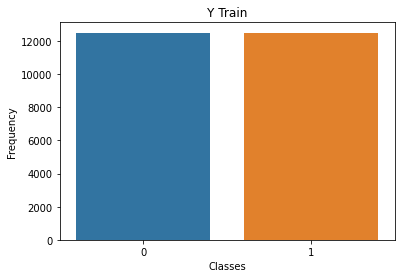

In [ ]:
plt.figure();
sns.countplot(Y_train);
plt.xlabel("Classes");
plt.ylabel("Frequency");
plt.title("Y Train");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


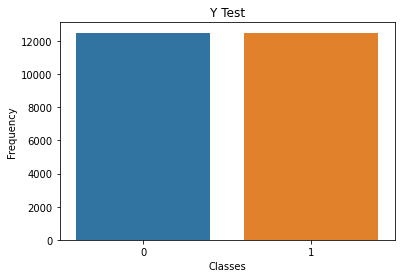

In [ ]:
plt.figure();
sns.countplot(Y_test);
plt.xlabel("Classes");
plt.ylabel("Frequency");
plt.title("Y Test");

In [ ]:
print(X_train[0])

[1, 608, 13, 6467, 14, 22, 13, 80, 1109, 14, 20, 584, 18, 231, 72, 141, 6, 783, 254, 189, 7060, 13, 100, 115, 106, 14, 20, 584, 207, 82, 557, 111, 111, 537, 7, 4, 962, 12, 69, 11, 45, 204, 766, 33, 4, 8334, 23, 94, 797, 1048, 991, 527, 1987, 538, 2629, 4, 4518, 125, 72, 449, 8295, 68, 3385, 2500, 93, 14, 1190, 22, 13, 119, 12, 13, 197, 4, 226, 22, 16, 542, 5, 221, 14, 20, 9, 38, 629, 14, 9, 4, 6128, 20, 13, 28, 126, 110, 11, 61, 113, 24, 15, 51, 571, 11, 4, 22, 5, 4, 326, 7, 4, 22, 26, 24, 629, 195, 21, 51, 210, 188, 72, 16, 21849, 2726, 116, 118, 189, 22, 126, 164, 70, 126, 30, 14, 629, 174, 2195, 829, 33, 94, 61124]


In [ ]:
review_len_train = []
review_len_test = []
for i,j in zip(X_train,X_test):
    review_len_train.append(len(i))
    review_len_test.append(len(j))

In [ ]:
print("min: ", min(review_len_train), "max: ", max(review_len_train))

min:  11 max:  2494


In [ ]:
print("min: ", min(review_len_test), "max: ", max(review_len_test))

min:  7 max:  2315


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


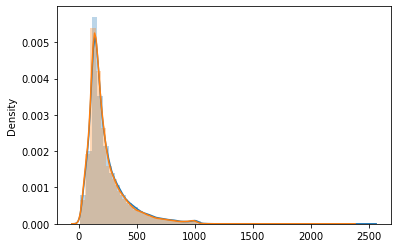

In [ ]:
sns.distplot(review_len_train,hist_kws={"alpha":0.3});
sns.distplot(review_len_test,hist_kws={"alpha":0.3});

In [ ]:
print("Train mean: ",np.mean(review_len_train))
print("Train median: ",np.median(review_len_train))
print("Train mode: ",stats.mode(review_len_train))

Train mean:  238.71364
Train median:  178.0
Train mode:  ModeResult(mode=array([132]), count=array([196]))


***No of words***

In [ ]:
word_index = imdb.get_word_index()
print(type(word_index))

1654784/1641221 [==============================] - 0s 0us/step
<class 'dict'>


In [ ]:
print("length of word_index: ",len(word_index))

length of word_index:  88584


In [ ]:
for keys,values in word_index.items():
    if values == 1:
        print(keys)

the


In [ ]:
def whatItSay(index=24):
    reverse_index = dict([(value,key) for (key,value) in word_index.items()])
    decode_review = " ".join([reverse_index.get(i-3, "!") for i in X_train[index]])
    print(decode_review)
    print(Y_train[index])
    return decode_review

decoded_review = whatItSay()

! this movie was extremely funny i would like to own this for my vintage collection of 1970s movie must see again list i know this cast of characters they are people that i have met over the years and that prompt me to search out this comedy unfortunately this was never put to dvd or vhs redd foxx always a clown of comedy pearl baily a great match as his wife witty and sassy norman a son with a secret not sure if he will have a future if it is out dennis dugan crazy funny man miss dobson hooker with a heart and little conscience love lust strange family ties this movie qualifies for a come back encore performance situation comedy with a mix of events as this could and should find its way as a remake i do think finding cast would be extremely difficult maybe impossible except jerry seinfeld playing dennis dugan role this earmarks a couple of seinfeld episodes that also brought me back to norman is that you keeping them in the closest was surely impossible as impossible to reform pretend

In [ ]:
decoded_review = whatItSay(5)

! quite possibly how francis veber one of the best comedy directors in the world at least when sticking to his native france managed to turn in a film so completely unwatchable is beyond the reason of mere mortal man to discern it's not just that the characters are so unlikeable or that the film is so utterly devoid of even the lowest form of wit it's genuinely physically painful to watch such an endless parade of inept writing acting and film making that you cannot believe this is the work of experienced and talented filmmakers for once the near eternity spent in the cutting room and on the shelf before its blink and you'll miss it theatrical release tells the whole story what were they thinking
0


***Preprocess***

In [ ]:
num_words = 20000
(X_train,Y_train),(X_test,Y_test) = imdb.load_data(num_words=num_words)

In [ ]:
maxlen=80
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [ ]:
print("X train shape: ",X_train.shape)

X train shape:  (25000, 80)


In [ ]:
print(X_train[5])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     1   778   128    74    12   630   163    15     4  1766  7982
  1051     2    32    85   156    45    40   148   139   121   664   665
    10    10  1361   173     4   749     2    16  3804     8     4   226
    65    12    43   127    24 15344    10    10]


In [ ]:
for i in X_train[0:10]:
    print(len(i))

80
80
80
80
80
80
80
80
80
80


In [ ]:
decoded_review = whatItSay(5)

! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! begins better than it ends funny that the russian submarine crew ! all other actors it's like those scenes where documentary shots br br spoiler part the message ! was contrary to the whole story it just does not mesh br br
0


***RNN model 1***

In [ ]:
rnn = Sequential()

rnn.add(Embedding(num_words,32,input_length =len(X_train[0]))) # num_words=15000
rnn.add(SimpleRNN(16,input_shape = (num_words,maxlen), return_sequences=False,activation="relu"))
rnn.add(Dense(1)) #flatten
rnn.add(Activation("sigmoid")) #using sigmoid for binary classification

print(rnn.summary())
rnn.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 32)            640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                784       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 640,801
Trainable params: 640,801
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = rnn.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs = 5,batch_size=128,verbose = 1)

Epoch 1/5
196/196 [==============================] - 11s 45ms/step - loss: 0.6170 - accuracy: 0.6732 - val_loss: 0.4849 - val_accuracy: 0.8027
Epoch 2/5
196/196 [==============================] - 8s 40ms/step - loss: 0.4157 - accuracy: 0.8190 - val_loss: 0.5237 - val_accuracy: 0.7833
Epoch 3/5
196/196 [==============================] - 8s 39ms/step - loss: 0.3214 - accuracy: 0.8662 - val_loss: 0.3975 - val_accuracy: 0.8313
Epoch 4/5
196/196 [==============================] - 8s 40ms/step - loss: 0.2660 - accuracy: 0.8906 - val_loss: 0.3721 - val_accuracy: 0.8370
Epoch 5/5
196/196 [==============================] - 8s 40ms/step - loss: 0.2274 - accuracy: 0.9071 - val_loss: 0.3790 - val_accuracy: 0.8392


***Accuracy***

In [ ]:
score = rnn.evaluate(X_test,Y_test)

782/782 [==============================] - 6s 8ms/step - loss: 0.3790 - accuracy: 0.8392


In [ ]:
print("accuracy:", score[1]*100)

accuracy: 83.91600251197815


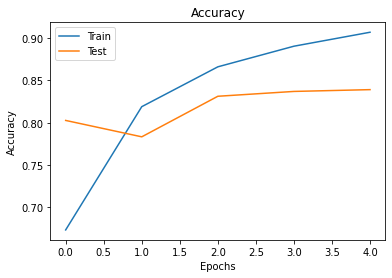

In [ ]:
plt.figure()
plt.plot(history.history["accuracy"],label="Train");
plt.plot(history.history["val_accuracy"],label="Test");
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show();

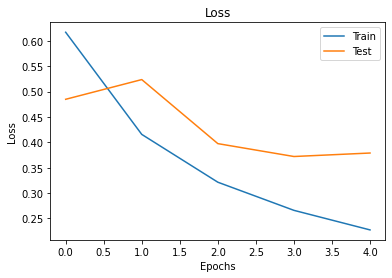

In [ ]:
plt.figure()
plt.plot(history.history["loss"],label="Train");
plt.plot(history.history["val_loss"],label="Test");
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show();

***Different max_features and max_len***

In [ ]:
num_words = 30000
(X_train,Y_train),(X_test,Y_test) = imdb.load_data(num_words=num_words)

In [ ]:
maxlen=130
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [ ]:
print("X train shape: ",X_train.shape)

X train shape:  (25000, 130)


In [ ]:
print(X_train[5])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     1   778   128    74    12   630   163    15     4
  1766  7982  1051     2    32    85   156    45    40   148   139   121
   664   665    10    10  1361   173     4   749     2    16  3804     8
     4   226    65    12    43   127    24 15344    10    10]


In [ ]:
for i in X_train[0:10]:
    print(len(i))

130
130
130
130
130
130
130
130
130
130


In [ ]:
decoded_review = whatItSay(5)

! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! begins better than it ends funny that the russian submarine crew ! all other actors it's like those scenes where documentary shots br br spoiler part the message ! was contrary to the whole story it just does not mesh br br
0


***RNN model 2***

In [ ]:
rnn = Sequential()

rnn.add(Embedding(num_words,32,input_length =len(X_train[0]))) # num_words=15000
rnn.add(SimpleRNN(16,input_shape = (num_words,maxlen), return_sequences=False,activation="relu"))
rnn.add(Dense(1)) #flatten
rnn.add(Activation("sigmoid")) #using sigmoid for binary classification

print(rnn.summary())
rnn.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 130, 32)           960000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 960,801
Trainable params: 960,801
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = rnn.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs = 5,batch_size=128,verbose = 1)

Epoch 1/5
196/196 [==============================] - 14s 62ms/step - loss: 0.6280 - accuracy: 0.6546 - val_loss: 0.4950 - val_accuracy: 0.7997
Epoch 2/5
196/196 [==============================] - 12s 62ms/step - loss: 0.4457 - accuracy: 0.8300 - val_loss: 0.4130 - val_accuracy: 0.8314
Epoch 3/5
196/196 [==============================] - 13s 64ms/step - loss: 0.3465 - accuracy: 0.8662 - val_loss: 0.4199 - val_accuracy: 0.8186
Epoch 4/5
196/196 [==============================] - 13s 68ms/step - loss: 0.2784 - accuracy: 0.8917 - val_loss: 0.3403 - val_accuracy: 0.8515
Epoch 5/5
196/196 [==============================] - 12s 62ms/step - loss: 0.2238 - accuracy: 0.9132 - val_loss: 0.3446 - val_accuracy: 0.8510


***Accuracy***

In [ ]:
score = rnn.evaluate(X_test,Y_test)

782/782 [==============================] - 9s 11ms/step - loss: 0.3446 - accuracy: 0.8510


In [ ]:
print("accuracy:", score[1]*100)

accuracy: 85.09600162506104


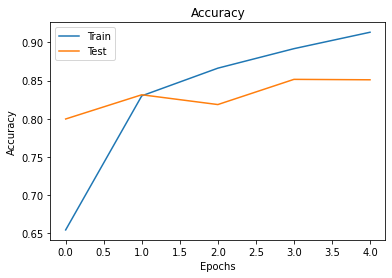

In [ ]:
plt.figure()
plt.plot(history.history["accuracy"],label="Train");
plt.plot(history.history["val_accuracy"],label="Test");
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show();

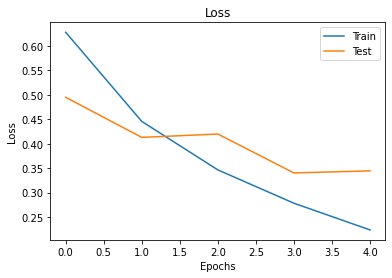

In [ ]:
plt.figure()
plt.plot(history.history["loss"],label="Train");
plt.plot(history.history["val_loss"],label="Test");
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show();

***2nd different***

In [ ]:
num_words = 40000
(X_train,Y_train),(X_test,Y_test) = imdb.load_data(num_words=num_words)

In [ ]:
maxlen=180
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [ ]:
print("X train shape: ",X_train.shape)

X train shape:  (25000, 180)


In [ ]:
print(X_train[5])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     1   778   128    74    12   630   163
    15     4  1766  7982  1051     2    32    85   156    45    40   148
   139   121   664   665    10    10  1361   173   

In [ ]:
for i in X_train[0:10]:
    print(len(i))

180
180
180
180
180
180
180
180
180
180


In [ ]:
decoded_review = whatItSay(5)

! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! begins better than it ends funny that the russian submarine crew ! all other actors it's like those scenes where documentary shots br br spoiler part the message ! was contrary to the whole story it just does not mesh br br
0


***RNN model 3***

In [ ]:
rnn = Sequential()

rnn.add(Embedding(num_words,32,input_length =len(X_train[0]))) # num_words=15000
rnn.add(SimpleRNN(16,input_shape = (num_words,maxlen), return_sequences=False,activation="relu"))
rnn.add(Dense(1)) #flatten
rnn.add(Activation("sigmoid")) #using sigmoid for binary classification

print(rnn.summary())
rnn.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 180, 32)           1280000   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
 activation_2 (Activation)   (None, 1)                 0         
                                                                 
Total params: 1,280,801
Trainable params: 1,280,801
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = rnn.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs = 5,batch_size=128,verbose = 1)

Epoch 1/5
196/196 [==============================] - 18s 86ms/step - loss: 0.6035 - accuracy: 0.6714 - val_loss: 0.5124 - val_accuracy: 0.8134
Epoch 2/5
196/196 [==============================] - 16s 81ms/step - loss: 0.4390 - accuracy: 0.8454 - val_loss: 0.4174 - val_accuracy: 0.8397
Epoch 3/5
196/196 [==============================] - 16s 83ms/step - loss: 0.3339 - accuracy: 0.8733 - val_loss: 0.4941 - val_accuracy: 0.7681
Epoch 4/5
196/196 [==============================] - 16s 83ms/step - loss: 0.2788 - accuracy: 0.8936 - val_loss: 0.3901 - val_accuracy: 0.8363
Epoch 5/5
196/196 [==============================] - 16s 83ms/step - loss: 0.2372 - accuracy: 0.9087 - val_loss: 0.4278 - val_accuracy: 0.8171


***Accuracy***

In [ ]:
score = rnn.evaluate(X_test,Y_test)

782/782 [==============================] - 10s 13ms/step - loss: 0.4278 - accuracy: 0.8171


In [ ]:
print("accuracy:", score[1]*100)

accuracy: 81.7080020904541


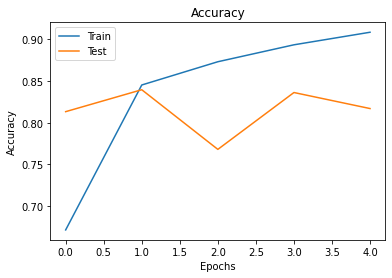

In [ ]:
plt.figure()
plt.plot(history.history["accuracy"],label="Train");
plt.plot(history.history["val_accuracy"],label="Test");
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show();

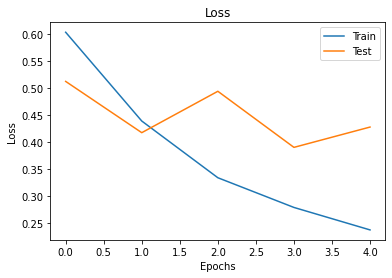

In [ ]:
plt.figure()
plt.plot(history.history["loss"],label="Train");
plt.plot(history.history["val_loss"],label="Test");
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show();

*As we increased max_features from 20000 to 30000 and max_len from 80 to 130 accuracy increased*

*But when further increasing the accuracy decreased*